In [1]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 5

# 欢迎来到线性回归项目¶
若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。    

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。    

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

# 1 矩阵运算    

## 1.1 创建一个 4*4 的单位矩阵

In [2]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A1 = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

# 向量也用二维列表表示
C = [[1],
     [2],
     [3]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,1]]

## 1.2 返回矩阵的行数和列数

In [3]:
# TODO 返回矩阵的行数和列数
def shape(M):
    r = len(M)
    c = len(M[0])
    return r,c

In [4]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [5]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    for p in M:
        for index in range(len(M[0])):
            p[index] = round(p[index], decPts)
    pass

In [6]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.036s

OK


## 1.4 计算矩阵的转置

In [7]:
# TODO 计算矩阵的转置
def transpose(M):
    c_trans, r_trans = shape(M)
    trans_M = []
    for i in range(r_trans):
        new_row = [0]*c_trans
        for j in range(c_trans):
            new_row[j] = M[j][i]
        new_row = tuple(new_row)
        trans_M.append(new_row)
    return trans_M

In [8]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.009s

OK


## 1.5 计算矩阵乘法 AB

In [9]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    r_A = len(A)
    c_A = len(A[0])
    r_B = len(B)
    c_B = len(B[0])
    multi_C = [[0]*c_B for i in range(r_A)]
    if c_A != r_B:
        raise ValueError("A can't mutiply with B")
    else:
        for i in range(r_A):
            for j in range(c_B):
                for k in range(c_A):
                    multi_C[i][j] += A[i][k]*B[k][j]
    return multi_C

In [10]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.046s

OK


# 2 Gaussign Jordan 消元法    

## 2.1 构造增广矩阵
$ A = \begin{bmatrix}
    a_{11}    ; a_{12} ; ... ; a_{1n}\\
    a_{21}    ; a_{22} ; ... ; a_{2n}\\
    a_{31}    ; a_{22} ; ... ; a_{3n}\\
    ...    ; ... ; ... ; ...\\
    a_{n1}    ; a_{n2} ; ... ; a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$
返回 $ Ab = \begin{bmatrix}
    a_{11}    ; a_{12} ; ... ; a_{1n} ; b_{1}\\
    a_{21}    ; a_{22} ; ... ; a_{2n} ; b_{2}\\
    a_{31}    ; a_{22} ; ... ; a_{3n} ; b_{3}\\
    ...    ; ... ; ... ; ...; ...\\
    a_{n1}    ; a_{n2} ; ... ; a_{nn} ; b_{n} \end{bmatrix}$

In [11]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    result = [[0]*(len(A[0])+1) for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(A[0])+1):
            if j < len(A[0]):
                result[i][j] = A[i][j]
            else:
                result[i][j] = b[i][0]
    return result

In [12]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


## 2.2 初等行变换    

    交换两行
    把某行乘以一个非零常数
    把某行加上另一行的若干倍：

In [13]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    M[r1], M[r2] = M[r2], M[r1]

In [14]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [15]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if scale != 0:
        for i in range(len(M[r])):
            M[r][i] = M[r][i]*scale
    else:
        raise ValueError("scale is 0")

In [16]:

# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [17]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    if scale != 0:
        for i in range(len(M[r1])):
            M[r1][i] += M[r2][i]*scale
    else:
        raise ValueError("scale is 0")

In [18]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## 2.3 Gaussian Jordan 消元法求解 Ax = b
### 2.3.1 算法
步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 中文维基链接

    对于Ab的每一列（最后一列除外）    
        当前列为列c    
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值    
        如果绝对值最大值为0    
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)    
        否则    
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c）     
            使用第二个行变换，将列c的对角线元素缩放为1    
            多次使用第三个行变换，将列c的其他元素消为0    

步骤4 返回Ab的最后一列    

注： 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演
为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为可逆矩阵，矩阵A为奇异矩阵两种情况。

In [19]:
from helper import *
# 不要修改这里！
A = generateMatrix(3,seed,singular=True)
b = np.ones(shape=(3,1),dtype=int)
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

  7, -1,  7 ||  1 
  3,  5, -1 ||  1 
  0,  0,  0 ||  1 


$Ab = \left\lgroup \matrix{7 & -1 & 7 & 1\cr 3 & 5 & -1&1\cr 0&0&0&1\cr} \right\rgroup\\
-->\left\lgroup \matrix{1 & \frac{-1}{7} & 1 & \frac{1}{7}\cr 0 & \frac{38}{7} & -4&\frac{4}{7}\cr 0&0&0&1\cr} \right\rgroup\\
-->\left\lgroup \matrix{1 & 0 & \frac{17}{19} & \frac{21}{133}\cr 0 & 1 & \frac{-14}{19}&\frac{2}{19}\cr 0&0&0&1\cr} \right\rgroup\\
-->\left\lgroup \matrix{1 & 0 & \frac{17}{19} & 0\cr 0 & 1 & \frac{-14}{19}&0\cr 0&0&0&1\cr} \right\rgroup
$

In [20]:
from helper import *
# 不要修改这里！
A = generateMatrix(3,seed,singular=False)
b = np.ones(shape=(3,1),dtype=int) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

 -7,  4,  5 ||  1 
 -4,  6, -1 ||  1 
 -2, -6, -3 ||  1 


$Ab = \left\lgroup \matrix{-7 & 4 & 5 & 1\cr -4 & 6 & -1&1\cr -2&-6&-3&1\cr} \right\rgroup\\
-->\left\lgroup \matrix{1 & \frac{-4}{7} & \frac{-5}{7} & \frac{-1}{7}\cr 0 & \frac{26}{7} & \frac{-27}{7}&\frac{3}{7}\cr 0&\frac{-50}{7}&\frac{-31}{7}&\frac{5}{7}\cr} \right\rgroup\\
-->\left\lgroup \matrix{1 & 0 & \frac{-9}{25} & \frac{-1}{5}\cr 0 & 1 & \frac{31}{50}&\frac{-1}{10}\cr 0&0&\frac{-154}{25}&\frac{4}{5}\cr} \right\rgroup\\
-->\left\lgroup \matrix{1 & 0 & 0 & \frac{-19}{77}\cr 0 & 1 & 0&\frac{-3}{154}\cr 0&0&1&\frac{-10}{77}\cr} \right\rgroup
$


### 2.3.3 实现 Gaussian Jordan 消元法

In [21]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""
def gj_Solve(A, b, decPts=4, epsilon=1.0e-16):
    if len(A) != len(b):    #如果 A，b 高度不同，返回None
        return None
    M = augmentMatrix(A,b)
    #print M
    for i in range(len(M[0])-1):    #取第i列
        #print 'i:',i
        value_list = [0]*(len(M)-i)
        for j in range(i,len(M)):
            value = M[j][i]
            value_list[j-i] = abs(value)
        #print 'value_list:',value_list    #对角线及对角线以下值绝对值的列表
        max_value = max(value_list)    #取第i列对角线及以下数值绝对值的最大值
        #print 'max_value:',max_value
        if max_value <= epsilon:    #如果最大值为0，则A为奇异矩阵，返回None
            return None
        else:
            for r in range(len(value_list)):
                if value_list[r] == max_value:    #取绝对值最大值所在行
                    #print '最大值所在行:',M[r+i]
                    #print '第i行:',M[i]
                    swapRows(M, i, r+i)    #绝对值最大值所在行与i行交换
                    #print '交换后的第i行:',M[i]
                    scaleRow(M, i, 1.0/M[i][i])     #1.0/M[i][i] 第i行对角线值变为1
                    #print '对角线值为1的第i行',M[i]
                    for l in range(len(M)):    #第i列除对角线值外的元素变为0
                        if l != i:
                            #print '第l行:',l
                            #print "第l行",M[l]
                            #print M[l][i]
                            if abs(M[l][i]) <= epsilon:    #M[l][i]值为0
                                continue
                            addScaledRow(M, l, i, -M[l][i])    #第i列第l个值变为0
                            #print '第i列第l个值为0的l行:',M[l]
                        else:
                            continue
                    #print M    #每一列循环后的M
                    break    #退出r的循环
    x = [0]*len(b)
    for i in range(len(M)):
        x[i] = M[i][-1]
    matxRound([x], decPts=4)
        
    return transpose([x])
#gj_Solve(A, b, decPts=4, epsilon=1.0e-16)

In [22]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 2.784s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：
在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。  

我们用正式的语言描述这个命题，并证明为真。  

证明下面的命题：  

如果方阵 A 可以被分为4个部分:  

$ A = \begin{bmatrix}
    I   ,  X \\
    Z   ,  Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，
那么A为奇异矩阵。  

提示：从多种角度都可以完成证明  

考虑矩阵 Y 和 矩阵 A 的秩  

考虑矩阵 Y 和 矩阵 A 的行列式  

考虑矩阵 A 的某一列是其他列的线性组合  

TODO 证明：  
1、设矩阵Y的第一列为矩阵A的第i列。因为矩阵I为单位矩阵，矩阵Y的第一列全为0，所以矩阵A的第i列为矩阵A第1列至第i-1列的线性组合。  

2、矩阵A的第i列可以通过线性变换，使全部元素变为0，线性变换后的矩阵为D    

3、因为：把行列式的某一行（列）的各元素乘以同一个值，然后加到另一行（列）对应的元素上，行列式的值不变。所以：矩阵A的行列式等于矩阵D的行列   

4、将矩阵D的行列式的第i行的所有元素乘以2，等于用2乘以矩阵D的行列式；又因为第i行的所有元素为0，乘以2后仍为零，依然等于矩阵D的行列式。所以：2|D|=|D|，所以|D|=0    

5、所以|A|=0，所以矩阵A为奇异矩阵

# 3 线性回归    

## 3.1 随机生成样本点

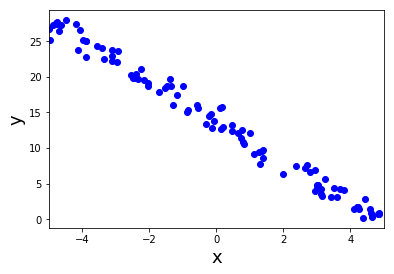

In [23]:

# 不要修改这里！
# 运行一次就够了！
from helper import *
from matplotlib import pyplot as plt
%matplotlib inline

X,Y = generatePoints(seed,num=100)

## 可视化
plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.show()

## 3.2 拟合一条直线    

### 3.2.1 猜测一条直线

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


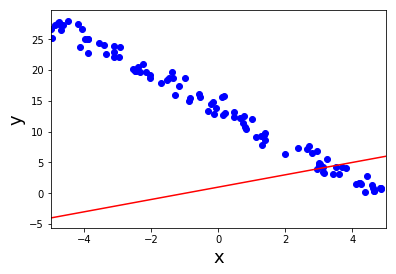

In [24]:
#TODO 请选择最适合的直线 y = mx + b
m1 = 1
b1 = 1

# 不要修改这里！
plt.xlim((-5,5))
x_vals = plt.axes().get_xlim()
y_vals = [m1*x+b1 for x in x_vals]
plt.plot(x_vals, y_vals, '-', color='r')

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')

plt.show()

### 3.2.2 计算平均平方误差 (MSE)    

    我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下： 
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [25]:
# TODO 实现以下函数并输出所选直线的MSE

def calculateMSE(X,Y,m,b):
    sum_value = 0
    for i in range(len(X)):
        distance_square = (Y[i]-m*X[i]-b)**2
        sum_value += distance_square
    return sum_value/len(X)

print(calculateMSE(X,Y,m1,b1))

300.115486819


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差
你可以调整3.2.1中的参数 $m1,b1$ 让蓝点均匀覆盖在红线周围，然后微调 $m1, b1$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

目标函数
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

二元二次方程组
$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

并求解最优参数 $m, b$
$$
m = -\frac{1}{3}\\    b = \frac{23}{9}
$$

### 3.3.3 将方程组写成矩阵形式
我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 $$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 : $$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1; 1 \\
    x_2; 1\\
    ...; ...\\
    x_n; 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

##  3.4 求解 $X^TXh = X^TY$
### 在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [26]:
# TODO 实现线性回归
'''
参数：X, Y 存储着一一对应的横坐标与纵坐标的两个一维数组
返回：m，b 浮点数
'''
def linearRegression(X,Y):
    matrix_X = []
    matrix_Y = []
    for x in X:
        matrix_X.append([x,1])
    for y in Y:
        matrix_Y.append([y])
    trans_X = transpose(matrix_X)
    A = matxMultiply(trans_X, matrix_X)
    b = matxMultiply(trans_X, matrix_Y)
    h = gj_Solve(A, b, decPts=4, epsilon=1.0e-16)
    m = h[0][0]
    b = h[1][0]
    return m,b

m2,b2 = linearRegression(X,Y)
assert isinstance(m2,float),"m is not a float"
assert isinstance(b2,float),"b is not a float"
print(m2,b2)

(-2.8231, 13.7472)


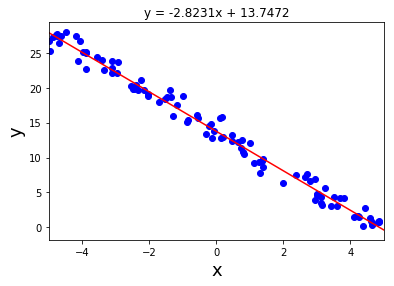

In [27]:
# 请不要修改下面的代码
x1,x2 = -5,5
y1,y2 = x1*m2+b2, x2*m2+b2

plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.plot((x1,x2),(y1,y2),'r')
plt.title('y = {m:.4f}x + {b:.4f}'.format(m=m2,b=b2))
plt.show()

In [28]:
print(calculateMSE(X,Y,m2,b2))

1.05730833597
